In [1]:
#import packages
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import impute

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn import metrics
from scipy.stats import chi2
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

import statsmodels.api as sm

## Import Datasets

In [2]:
BASE_DIR = "/Users/Avinash/Documents/Kanchanah/Springboard/Data_Science_Track/Capstone_Two_Other_Material/"

X_train = "Data/X_train.csv"
X_test = "Data/X_test.csv"
y_train = "Data/y_train.csv"
y_test = "Data/y_test.csv"

In [3]:
X_train = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, X_train)),index_col=0)
X_test = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, X_test)),index_col=0)
y_train = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, y_train)),index_col=0)
y_test = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, y_test)),index_col=0)

In [4]:
X_train.head()

,CARSHARE,DRVRCNT,HHSIZE,HHVEHCNT,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,...,R_RACE_label_DONT_KNOW,R_RACE_label_MULTIPLE_RESPONSES_SELECTED,R_RACE_label_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,R_RACE_label_REFUSED,R_RACE_label_SOME_OTHER_RACE,R_RACE_label_WHITE,R_SEX_label_MALE,VEHOWNED_label_YES,WKFTPT_label_PART-TIME,WKRMHM_label_YES
0,0.0,0.000,0.000000,0.090909,0.609195,0.033333,0.000000,0.454545,0.142857,0.050,...,0,0,0,0,0,1,0,1,0,0
1,0.0,0.250,0.166667,0.090909,0.609195,0.033333,0.153846,0.454545,0.142857,0.050,...,0,0,0,0,0,0,1,1,0,0
2,0.0,0.125,0.083333,0.090909,0.666667,0.033333,0.000000,0.454545,0.000000,0.050,...,0,0,0,0,0,1,0,1,0,0
3,0.0,0.000,0.000000,0.000000,0.781609,0.033333,0.230769,0.454545,0.000000,0.005,...,0,0,0,0,0,1,1,1,0,0
4,0.0,0.125,0.250000,0.090909,0.344828,0.100000,0.333333,0.363636,0.285714,0.050,...,0,0,0,0,0,0,1,0,0,0


In [5]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140394 entries, 0 to 140393
Data columns (total 125 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   CARSHARE                                                       float64
 1   DRVRCNT                                                        float64
 2   HHSIZE                                                         float64
 3   HHVEHCNT                                                       float64
 4   R_AGE                                                          float64
 5   TIMETOWK                                                       float64
 6   VEHAGE                                                         float64
 7   VEHOWNMO                                                       float64
 8   WRKCOUNT                                                       float64
 9   YEARMILE                                       

In [6]:
X_train.shape

(140394, 125)

In [7]:
X_test.head()

,CARSHARE,DRVRCNT,HHSIZE,HHVEHCNT,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,...,R_RACE_label_DON'T KNOW,R_RACE_label_MULTIPLE RESPONSES SELECTED,R_RACE_label_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,R_RACE_label_REFUSED,R_RACE_label_SOME OTHER RACE,R_RACE_label_WHITE,R_SEX_label_MALE,VEHOWNED_label_YES,WKFTPT_label_PART-TIME,WKRMHM_label_YES
0,0.0,0.125,0.083333,0.181818,0.252874,0.025000,0.076923,0.454545,0.285714,0.065,...,0,0,0,0,0,1,0,1,0,1
1,0.0,0.125,0.083333,0.181818,0.689655,0.033333,0.076923,0.363636,0.000000,0.015,...,0,0,0,0,0,1,1,0,0,0
2,0.0,0.000,0.250000,0.000000,0.310345,0.033333,0.384615,0.909091,0.142857,0.050,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.125,0.083333,0.090909,0.724138,0.075000,0.410256,0.454545,0.285714,0.025,...,0,0,0,0,0,1,1,1,1,0
4,0.0,0.125,0.250000,0.090909,0.356322,0.025000,0.025641,0.454545,0.142857,0.090,...,0,0,0,0,0,1,1,1,0,1


In [8]:
X_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60170 entries, 0 to 60169
Data columns (total 125 columns):
 #   Column                                                            Dtype  
---  ------                                                            -----  
 0   CARSHARE                                                          float64
 1   DRVRCNT                                                           float64
 2   HHSIZE                                                            float64
 3   HHVEHCNT                                                          float64
 4   R_AGE                                                             float64
 5   TIMETOWK                                                          float64
 6   VEHAGE                                                            float64
 7   VEHOWNMO                                                          float64
 8   WRKCOUNT                                                          float64
 9   YEARMILE        

In [9]:
X_test.shape

(60170, 125)

In [10]:
X_test.head()

,CARSHARE,DRVRCNT,HHSIZE,HHVEHCNT,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,...,R_RACE_label_DON'T KNOW,R_RACE_label_MULTIPLE RESPONSES SELECTED,R_RACE_label_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,R_RACE_label_REFUSED,R_RACE_label_SOME OTHER RACE,R_RACE_label_WHITE,R_SEX_label_MALE,VEHOWNED_label_YES,WKFTPT_label_PART-TIME,WKRMHM_label_YES
0,0.0,0.125,0.083333,0.181818,0.252874,0.025000,0.076923,0.454545,0.285714,0.065,...,0,0,0,0,0,1,0,1,0,1
1,0.0,0.125,0.083333,0.181818,0.689655,0.033333,0.076923,0.363636,0.000000,0.015,...,0,0,0,0,0,1,1,0,0,0
2,0.0,0.000,0.250000,0.000000,0.310345,0.033333,0.384615,0.909091,0.142857,0.050,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.125,0.083333,0.090909,0.724138,0.075000,0.410256,0.454545,0.285714,0.025,...,0,0,0,0,0,1,1,1,1,0
4,0.0,0.125,0.250000,0.090909,0.356322,0.025000,0.025641,0.454545,0.142857,0.090,...,0,0,0,0,0,1,1,1,0,1


In [11]:
y_train.shape

(140394, 1)

In [12]:
y_train.head()

,fueltype_numeric
165952,0
161420,0
231467,0
109716,0
187414,0


In [13]:
y_test.shape

(60170, 1)

In [14]:
y_test.head()

,fueltype_numeric
205300,0
150902,0
70631,0
53212,0
197639,0


## Model Building

Create a few functions

In [15]:
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = metrics.confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    

In [16]:
def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=None):

    labels = np.array(labels)
    features_alternate = np.array(features_alternate)
    

    null_prob = sum(labels) / float(labels.shape[0]) * \
                    np.ones(labels.shape)
    df = features_alternate.shape[1]
    
    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)

    alt_log_likelihood = -log_loss(labels,
                                   alt_prob,
                                   normalize=False)
    null_log_likelihood = -log_loss(labels,
                                    null_prob,
                                    normalize=False)

    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = chi2.sf(G, df)

    return G, p_value

### Logistic Regression using sklearn

In [17]:
#penalty should be none
lr = LogisticRegression(penalty='none',solver='newton-cg')
lr.fit(X_train, y_train)

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='none', solver='newton-cg')

In [18]:
lr.coef_.shape

(1, 125)

In [19]:
lr.intercept_

array([-4.7943273])

In [20]:
pred_train_lr = lr.predict(X_train)

In [21]:
cm = metrics.confusion_matrix(y_train, pred_train_lr)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[136224      0]
 [  4170      0]]


In [22]:
f1_train = metrics.f1_score(y_train, pred_train_lr)
print('The f1 score for the testing data:', f1_train)

The f1 score for the testing data: 0.0


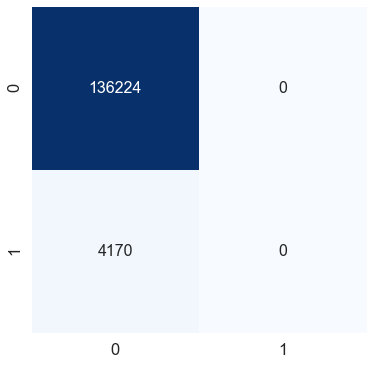

In [23]:
#present a nicer table
conf_matrix(y_train, pred_train_lr)

In [24]:
#calculate likelihood ratio test
G2, pvalue = likelihood_ratio_test(X_train, y_train, lr, features_null=None)
print("The Likelihood Ratio Test Statistics is {0} and the p-value is {1}".format(G2,pvalue))

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Likelihood Ratio Test Statistics is 4199.247434627381 and the p-value is 0.0


So, since the p-value is 0 so this model is better than a reduced model with beta1=0, beta2=0, ....beta125=0.But the F1 score is so low.

### Logistic Regression with class weights (balanced) using sklearn

Class weights do help with imbalanced data

In [25]:
lr_cb = LogisticRegression(penalty='none',solver='newton-cg',class_weight='balanced')

In [26]:
lr_cb.fit(X_train, y_train)

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', penalty='none', solver='newton-cg')

In [27]:
pred_train_cb = lr_cb.predict(X_train)

In [28]:
f1_train_cb = metrics.f1_score(y_train, pred_train_cb)
print('The f1 score for the testing data:', f1_train_cb)

The f1 score for the testing data: 0.11870039488603043


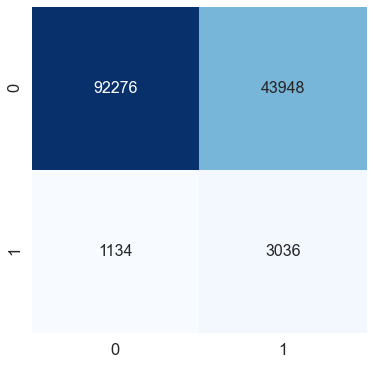

In [29]:
conf_matrix(y_train, pred_train_cb)

Seems to improve results!

### Logistic Regression with class weights (manual) using sklearn

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr_gr = LogisticRegression(penalty='none',solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr_gr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

**The class weights were tried with 200 candidates. I am unable to reproduce that today**

In [ ]:
val = weigh_data['weight'][np.argmax(weigh_data['score'])]

In [30]:
#The class weights were tried with 200 candidates. I am unable to reproduce that today.
lr_gr_c = LogisticRegression(penalty='none',solver='newton-cg',class_weight={0: 0.08954773869346733, 1: 0.91045226130653272})
lr_gr_c.fit(X_train, y_train)

# Predicting on the test data
pred_train_gr_c = lr_gr_c.predict(X_train)

#Calculating and printing the f1 score 
f1_train_gr_c = metrics.f1_score(y_train, pred_train_gr_c)
print('The f1 score for the testing data:', f1_train_gr_c)



/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The f1 score for the testing data: 0.17355637767411936


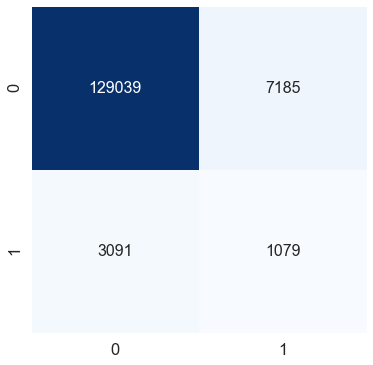

In [31]:
#Ploting the confusion matrix
conf_matrix(y_train, pred_train_gr_c)

### Logistic Regression with L1 penalty

In [32]:
lr_l1 = LogisticRegression(penalty='l1',solver='liblinear',random_state=1)

In [33]:
#Fit the model
lr_l1.fit(X_train, y_train)

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

In [34]:
#Get variable names that were zeroed out
#If one category of a variables is zeroed out, do I drop all categories?
col = X_train.columns[np.where(lr_l1.coef_==0)[1]]
col

Index(['CARSHARE', 'HHFAMINC_label_LESS_THAN_10000', 'HHSTATE_label_AR',
       'HHSTATE_label_AZ', 'HHSTATE_label_CT', 'HHSTATE_label_KS',
       'HHSTATE_label_KY', 'HHSTATE_label_LA', 'HHSTATE_label_MO',
       'HHSTATE_label_MS', 'HHSTATE_label_NH', 'HHSTATE_label_NJ',
       'HHSTATE_label_TN', 'HHSTATE_label_WV', 'HHSTATE_label_WY',
       'OCCAT_label_SOMETHING_ELSE',
       'R_RACE_label_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER'],
      dtype='object')

**If one category of a variables is zeroed out, do I drop all categories for that variable?**

**A bit confused about this. What's the difference between doing a l1 using Logistic regression with a l1 penalty and Lasso?**



## Poisson Regression

In [35]:
from sklearn import linear_model
clf = linear_model.PoissonRegressor()

In [36]:
clf.fit(X_train, y_train)

# Predicting on the test data
pred_train_p = clf.predict(X_train)

prediction = list(map(round, pred_train_p))
#Calculating and printing the f1 score 
f1_test_p = metrics.f1_score(y_train, prediction)
print('The f1 score for the testing data:', f1_test_p)


/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The f1 score for the testing data: 0.0


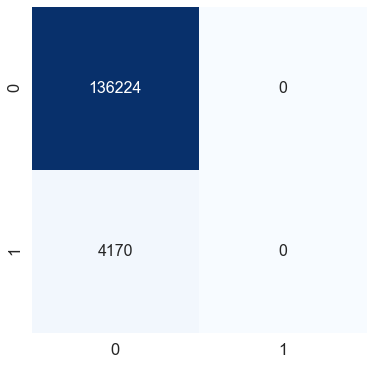

In [37]:
#Ploting the confusion matrix
conf_matrix(y_train, prediction)

### Random Forest

In [38]:
rfc = RandomForestClassifier(random_state = 42)

In [39]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4, 5, 6],
    'criterion' :['gini']
}

In [40]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200]})

In [41]:
#Fit with the best model and get the variables
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [42]:
rfc_best = RandomForestClassifier(criterion='gini',max_depth = 4,max_features = 'auto',n_estimators = 100)

In [43]:
rfc_best.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=4)

In [44]:
for feature in zip(list(X_train.columns), rfc_best.feature_importances_):
    print(feature)

('CARSHARE', 0.001668686199293114)
('DRVRCNT', 0.0018560771455710789)
('HHSIZE', 0.001540083004953069)
('HHVEHCNT', 0.0038415627255347713)
('R_AGE', 0.009151170454196559)
('TIMETOWK', 0.015527567071565168)
('VEHAGE', 0.17764418335224572)
('VEHOWNMO', 0.004185256478057969)
('WRKCOUNT', 0.0028153273507337574)
('YEARMILE', 0.009212580401972275)
('YOUNGCHILD', 0.000827031744636543)
('CAR_label_A_FEW_TIMES_A_WEEK', 0.002629559475409077)
('CAR_label_A_FEW_TIMES_A_YEAR', 0.00012297029270276008)
('CAR_label_DAILY', 0.0009743018328701919)
('CAR_label_NEVER', 0.0)
('EDUC_label_GRADUATE_DEGREE_OR_PROFESSIONAL_DEGREE', 0.18543458866254858)
('EDUC_label_HIGH_SCHOOL_GRADUATE_OR_GED', 0.05848985773847625)
('EDUC_label_LESS_THAN_A_HIGH_SCHOOL_GRADUATE', 0.003144084659175591)
('EDUC_label_SOME_COLLEGE_OR_ASSOCIATES_DEGREE', 0.03238079566855717)
('GT1JBLWK_label_YES', 0.00016213607275379562)
('HBHUR_label_SECOND_CITY', 9.612897536114176e-05)
('HBHUR_label_SMALL_TOWN', 0.001136515226552452)
('HBHUR_label

In [45]:
sfm = SelectFromModel(rfc_best, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(max_depth=4), threshold=0.15)

In [46]:
for feature_list_index in sfm.get_support(indices=True):
    print(list(X_train.columns)[feature_list_index])

VEHAGE
EDUC_label_GRADUATE_DEGREE_OR_PROFESSIONAL_DEGREE
HHSTATE_label_CO


**Need help with this**